In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
plt.rcParams["figure.figsize"] = (14,8)

In [37]:
df = pd.read_csv("Sensors.csv")
df

,Fecha,AF-01,Temperatura,Nivel embalse,Precipitaciones
0,2010-02-15,11.45,-0.9,794.87,0.0
1,2010-03-08,11.57,3.8,796.32,3.8
2,2010-04-07,12.03,15.3,798.08,0.0
3,2010-08-06,23.34,23.6,798.14,0.0
4,2011-04-01,23.03,19.0,796.93,0.2
...,...,...,...,...,...
2501,2020-06-14,17.51,17.2,799.80,0.0
2502,2020-06-15,17.51,19.7,799.84,0.0
2503,2020-06-16,17.51,20.1,799.86,7.0
2504,2020-06-17,17.51,19.3,799.89,0.4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            2506 non-null   datetime64[ns]
 1   AF-01            2506 non-null   float64       
 2   Temperatura      2506 non-null   float64       
 3   Nivel embalse    2506 non-null   float64       
 4   Precipitaciones  2506 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 98.0 KB


In [39]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df

,Fecha,AF-01,Temperatura,Nivel embalse,Precipitaciones
0,2010-02-15,11.45,-0.9,794.87,0.0
1,2010-03-08,11.57,3.8,796.32,3.8
2,2010-04-07,12.03,15.3,798.08,0.0
3,2010-08-06,23.34,23.6,798.14,0.0
4,2011-04-01,23.03,19.0,796.93,0.2
...,...,...,...,...,...
2501,2020-06-14,17.51,17.2,799.80,0.0
2502,2020-06-15,17.51,19.7,799.84,0.0
2503,2020-06-16,17.51,20.1,799.86,7.0
2504,2020-06-17,17.51,19.3,799.89,0.4


In [41]:
min(df["Fecha"]), max(df["Fecha"])

(Timestamp('2010-02-15 00:00:00'), Timestamp('2020-06-18 00:00:00'))

In [42]:
pd.date_range(min(df["Fecha"]), max(df["Fecha"]), freq="D")

DatetimeIndex(['2010-02-15', '2010-02-16', '2010-02-17', '2010-02-18',
               '2010-02-19', '2010-02-20', '2010-02-21', '2010-02-22',
               '2010-02-23', '2010-02-24',
               ...
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18'],
              dtype='datetime64[ns]', length=3777, freq='D')

In [43]:
df2 = pd.DataFrame(pd.date_range(min(df["Fecha"]), max(df["Fecha"]), freq="D"),columns = ["Fecha"])
df2

,Fecha
0,2010-02-15
1,2010-02-16
2,2010-02-17
3,2010-02-18
4,2010-02-19
...,...
3772,2020-06-14
3773,2020-06-15
3774,2020-06-16
3775,2020-06-17


In [44]:
df = pd.merge(df2,df,on="Fecha",how="outer")
df

,Fecha,AF-01,Temperatura,Nivel embalse,Precipitaciones
0,2010-02-15,11.45,-0.9,794.87,0.0
1,2010-02-16,NaN,NaN,NaN,NaN
2,2010-02-17,NaN,NaN,NaN,NaN
3,2010-02-18,NaN,NaN,NaN,NaN
4,2010-02-19,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3772,2020-06-14,17.51,17.2,799.80,0.0
3773,2020-06-15,17.51,19.7,799.84,0.0
3774,2020-06-16,17.51,20.1,799.86,7.0
3775,2020-06-17,17.51,19.3,799.89,0.4


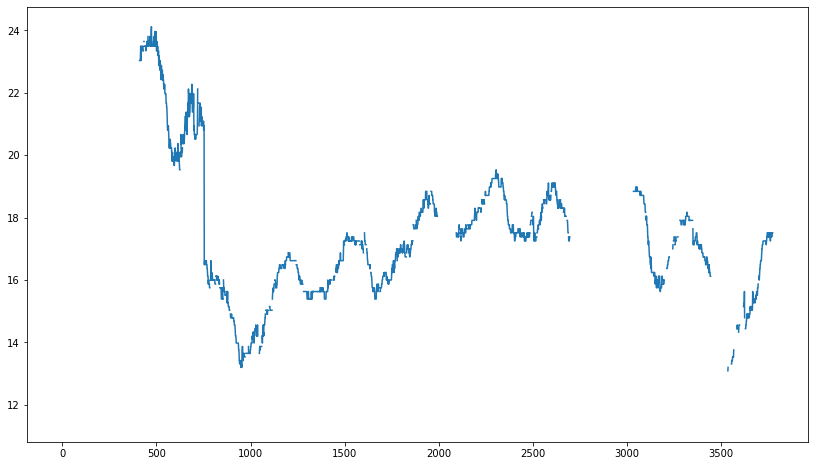

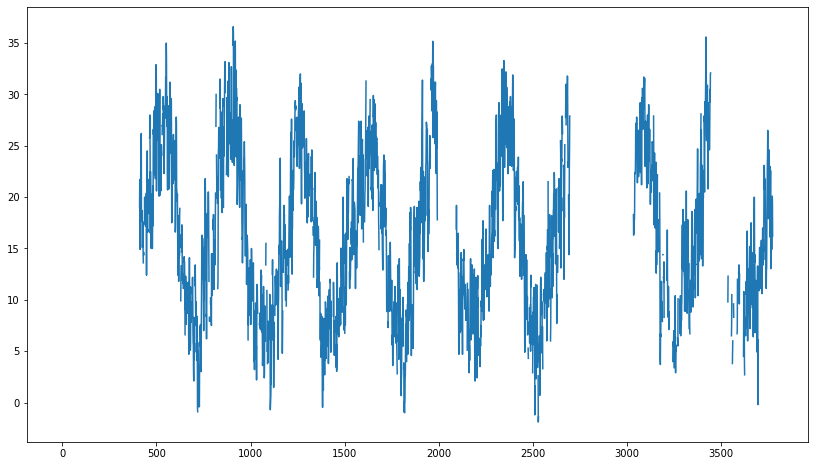

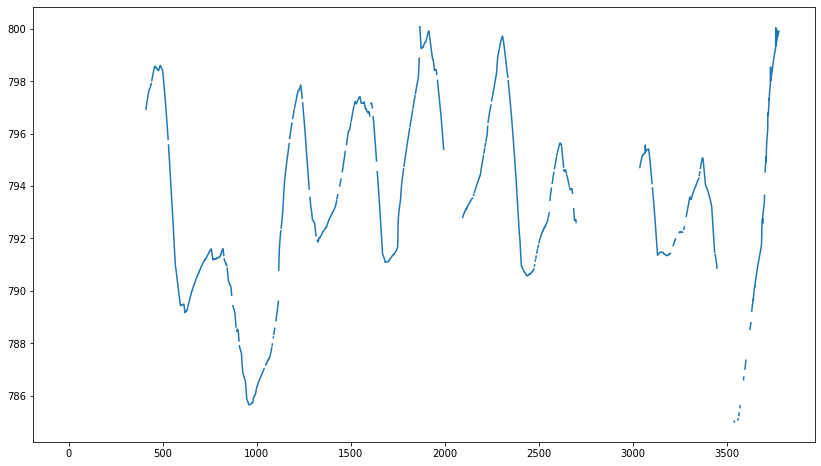

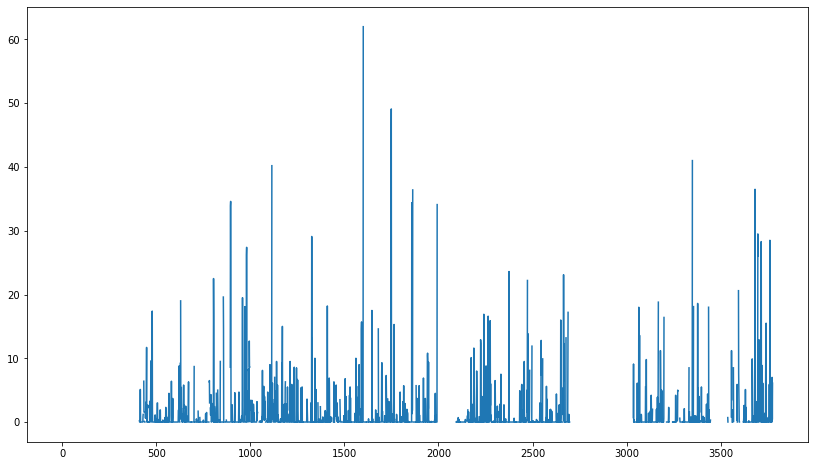

In [13]:
for i in df.columns[1:]:
    plt.plot(df[i])
    plt.show()

In [45]:
df2 = df.resample('7D', on='Fecha').mean()
df2

,AF-01,Temperatura,Nivel embalse,Precipitaciones
Fecha,,,,
2010-02-15,11.450000,-0.900000,794.870000,0.000000
2010-02-22,NaN,NaN,NaN,NaN
2010-03-01,NaN,NaN,NaN,NaN
2010-03-08,11.570000,3.800000,796.320000,3.800000
2010-03-15,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-05-18,17.454286,21.842857,798.872857,0.000000
2020-05-25,17.454286,21.657143,799.164286,0.100000
2020-06-01,17.380000,20.971429,799.554286,5.085714


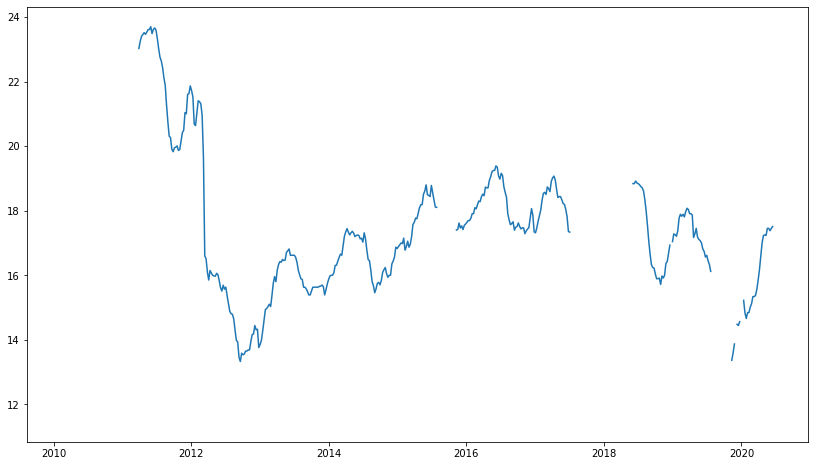

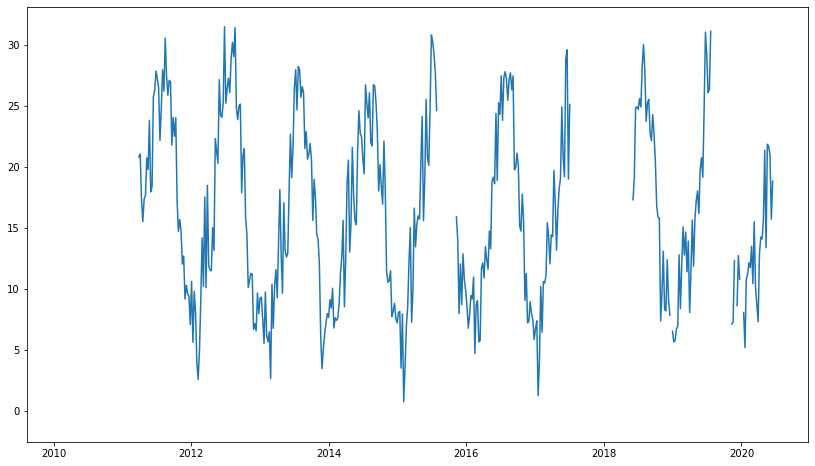

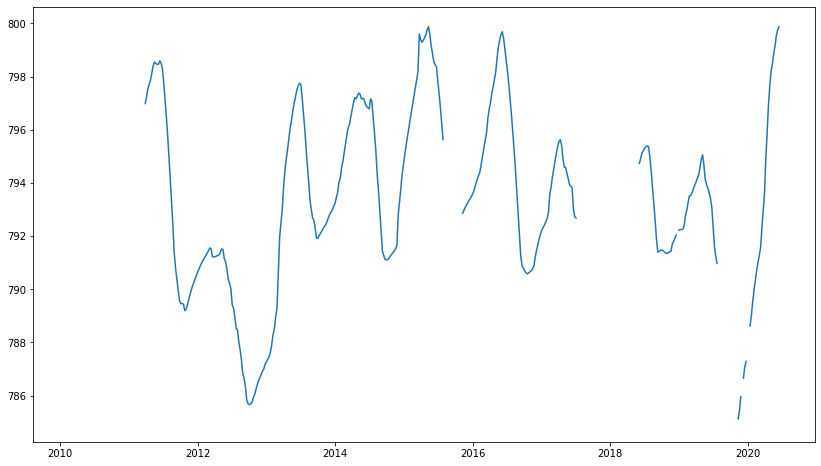

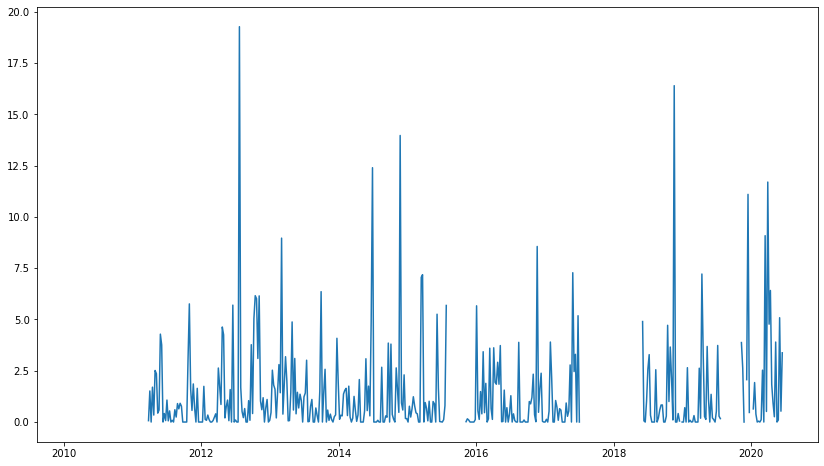

In [46]:
for i in df.columns[1:]:
    plt.plot(df2[i])
    plt.show()

In [47]:
df2.interpolate(method='linear', inplace=True)
df2

,AF-01,Temperatura,Nivel embalse,Precipitaciones
Fecha,,,,
2010-02-15,11.450000,-0.900000,794.870000,0.000000
2010-02-22,11.490000,0.666667,795.353333,1.266667
2010-03-01,11.530000,2.233333,795.836667,2.533333
2010-03-08,11.570000,3.800000,796.320000,3.800000
2010-03-15,11.685000,6.675000,796.760000,2.850000
...,...,...,...,...
2020-05-18,17.454286,21.842857,798.872857,0.000000
2020-05-25,17.454286,21.657143,799.164286,0.100000
2020-06-01,17.380000,20.971429,799.554286,5.085714


In [48]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 540 entries, 2010-02-15 to 2020-06-15
Freq: 7D
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AF-01            540 non-null    float64
 1   Temperatura      540 non-null    float64
 2   Nivel embalse    540 non-null    float64
 3   Precipitaciones  540 non-null    float64
dtypes: float64(4)
memory usage: 21.1 KB


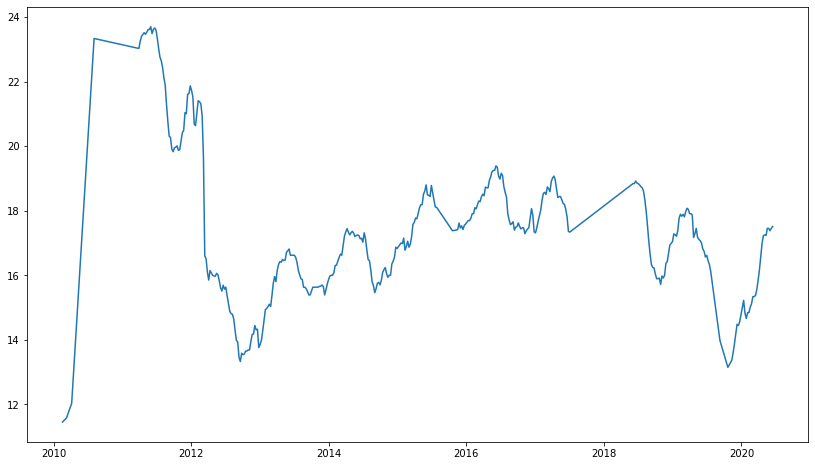

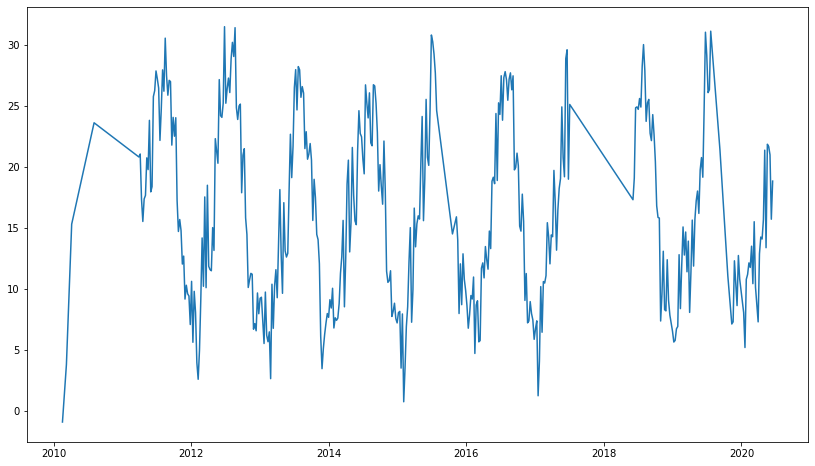

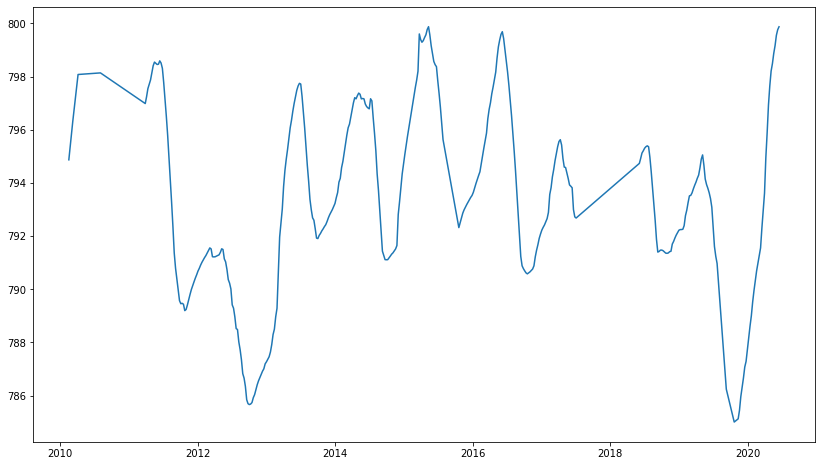

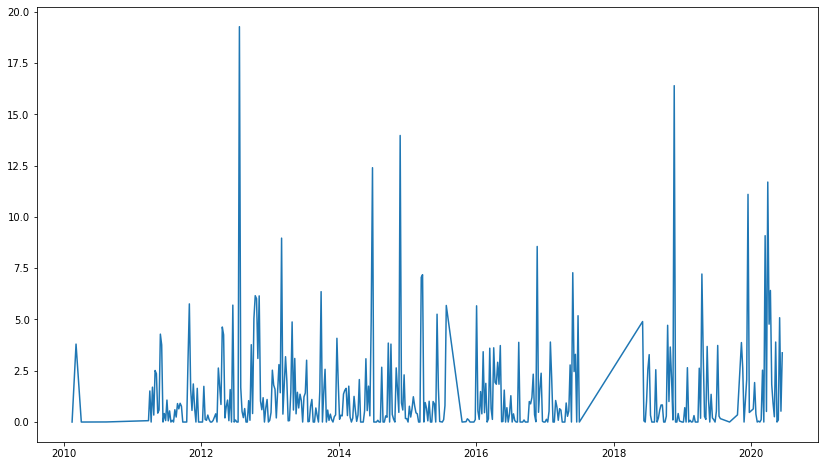

In [49]:
for i in df.columns[1:]:
    plt.plot(df2[i])
    plt.show()

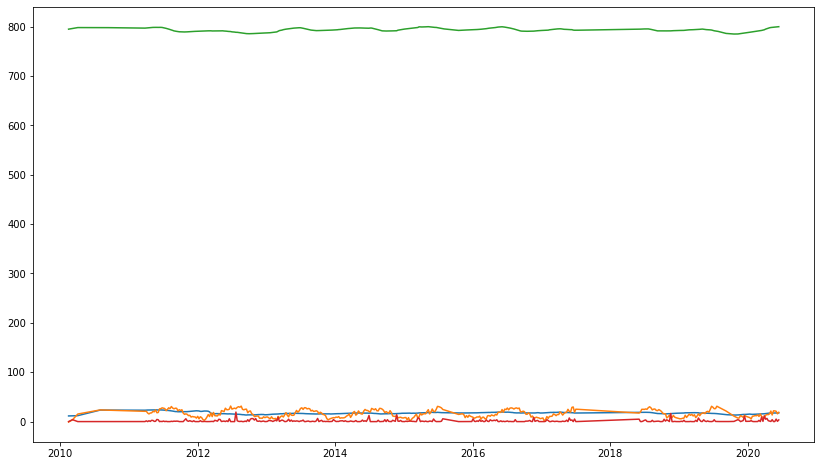

In [50]:
plt.plot(df2)
plt.show()

In [19]:
df2.values.shape

(540, 4)

In [56]:
scaler2 = MinMaxScaler()
datos = scaler2.fit_transform(df2.values)
datos

array([[0.        , 0.        , 0.66325698, 0.        ],
       [0.00326397, 0.04840371, 0.69575309, 0.06571552],
       [0.00652795, 0.09680742, 0.72824921, 0.13143104],
       ...,
       [0.48388413, 0.6757393 , 0.97819719, 0.26385029],
       [0.48994579, 0.51300574, 0.99231619, 0.02742264],
       [0.49449204, 0.60942327, 0.99975988, 0.17509728]])

In [ ]:
scaler = MinMaxScaler()
datos_af01 = scaler.fit_transform(df2[['AF-01']].values)
datos_af01

In [73]:

datos_af01[:40]

array([[0.        ],
       [0.00326397],
       [0.00652795],
       [0.00979192],
       [0.01917585],
       [0.02855977],
       [0.0379437 ],
       [0.04732762],
       [0.10161519],
       [0.15590275],
       [0.21019032],
       [0.26447788],
       [0.31876545],
       [0.37305302],
       [0.42734058],
       [0.48162815],
       [0.53591571],
       [0.59020328],
       [0.64449084],
       [0.69877841],
       [0.75306598],
       [0.80735354],
       [0.86164111],
       [0.91592867],
       [0.97021624],
       [0.96947224],
       [0.96872825],
       [0.96798426],
       [0.96724026],
       [0.96649627],
       [0.96575227],
       [0.96500828],
       [0.96426429],
       [0.96352029],
       [0.9627763 ],
       [0.9620323 ],
       [0.96128831],
       [0.96054432],
       [0.95980032],
       [0.95905633]])

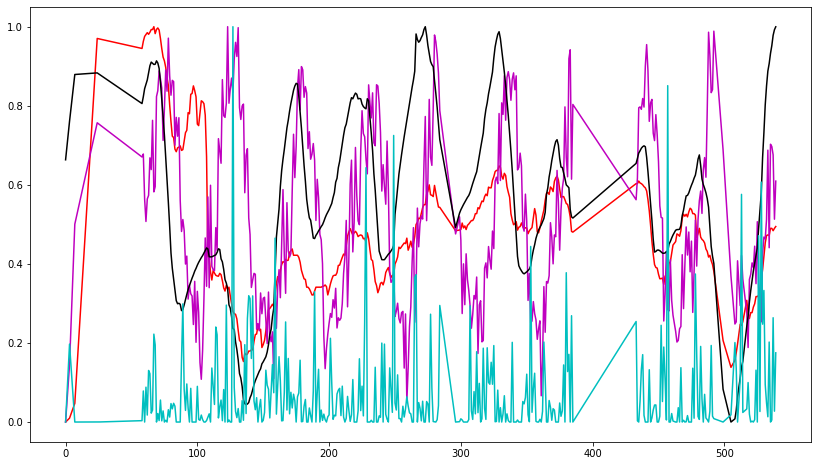

In [52]:
plt.plot(datos[:,0], "r") #sensor AF-01
plt.plot(datos[:,1], "m") #Temperatura
plt.plot(datos[:,2], "black") #Nivel del embalse
plt.plot(datos[:,3], "c") #Precipitaciones
plt.show()

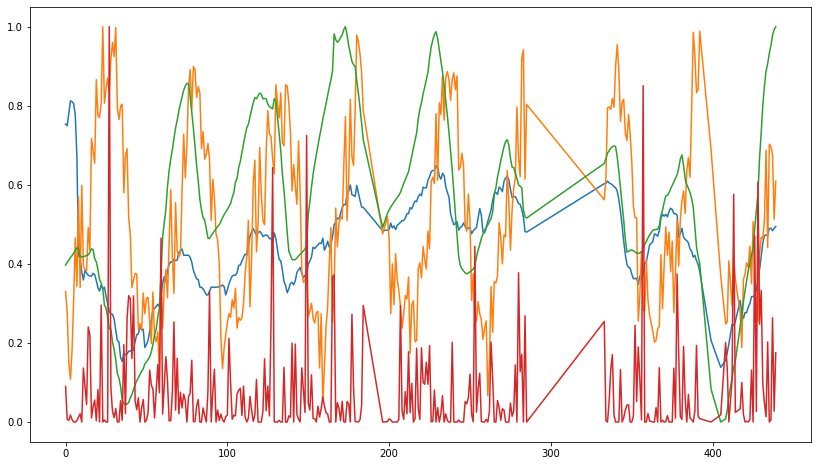

In [53]:
plt.plot(datos[100:,:])
plt.show()

In [58]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [98]:
series = series_to_supervised(datos, 5,3)
series

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var1(t-3),var2(t-3),...,var3(t),var4(t),var1(t+1),var2(t+1),var3(t+1),var4(t+1),var1(t+2),var2(t+2),var3(t+2),var4(t+2)
5,0.000000,0.000000,0.663257,0.000000,0.003264,0.048404,0.695753,0.065716,0.006528,0.096807,...,0.819911,0.098573,0.037944,0.411689,0.849493,0.049287,0.047328,0.500515,0.879076,0.000000
6,0.003264,0.048404,0.695753,0.065716,0.006528,0.096807,0.728249,0.131431,0.009792,0.145211,...,0.849493,0.049287,0.047328,0.500515,0.879076,0.000000,0.101615,0.515599,0.879313,0.000000
7,0.006528,0.096807,0.728249,0.131431,0.009792,0.145211,0.760745,0.197147,0.019176,0.234037,...,0.879076,0.000000,0.101615,0.515599,0.879313,0.000000,0.155903,0.530684,0.879551,0.000000
8,0.009792,0.145211,0.760745,0.197147,0.019176,0.234037,0.790328,0.147860,0.028560,0.322863,...,0.879313,0.000000,0.155903,0.530684,0.879551,0.000000,0.210190,0.545768,0.879788,0.000000
9,0.019176,0.234037,0.790328,0.147860,0.028560,0.322863,0.819911,0.098573,0.037944,0.411689,...,0.879551,0.000000,0.210190,0.545768,0.879788,0.000000,0.264478,0.560853,0.880025,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.358874,0.253347,0.579081,0.607004,0.385499,0.425482,0.668924,0.247545,0.418838,0.467853,...,0.887720,0.013341,0.471877,0.440930,0.906642,0.202335,0.489946,0.702663,0.932382,0.000000
534,0.385499,0.425482,0.668924,0.247545,0.418838,0.467853,0.731931,0.332777,0.452876,0.462998,...,0.906642,0.202335,0.489946,0.702663,0.932382,0.000000,0.489946,0.696925,0.951976,0.005188
535,0.418838,0.467853,0.731931,0.332777,0.452876,0.462998,0.802046,0.094868,0.471877,0.512432,...,0.932382,0.000000,0.489946,0.696925,0.951976,0.005188,0.483884,0.675739,0.978197,0.263850
536,0.452876,0.462998,0.802046,0.094868,0.471877,0.512432,0.850166,0.048175,0.473276,0.687656,...,0.951976,0.005188,0.483884,0.675739,0.978197,0.263850,0.489946,0.513006,0.992316,0.027423


In [87]:
series.drop(["var1(t)","var1(t+1)"], axis=1,inplace=True)
series

,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t+2)
5,0.000000,0.003264,0.006528,0.009792,0.019176,0.047328
6,0.003264,0.006528,0.009792,0.019176,0.028560,0.101615
7,0.006528,0.009792,0.019176,0.028560,0.037944,0.155903
8,0.009792,0.019176,0.028560,0.037944,0.047328,0.210190
9,0.019176,0.028560,0.037944,0.047328,0.101615,0.264478
...,...,...,...,...,...,...
533,0.358874,0.385499,0.418838,0.452876,0.471877,0.489946
534,0.385499,0.418838,0.452876,0.471877,0.473276,0.489946
535,0.418838,0.452876,0.471877,0.473276,0.471877,0.483884
536,0.452876,0.471877,0.473276,0.471877,0.489946,0.489946


In [88]:
values = series.values
corte = 350
train = values[:corte, :]
test = values[corte:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("train:",train_X.shape, train_y.shape, "test:",test_X.shape, test_y.shape)

train: (350, 1, 5) (350,) test: (183, 1, 5) (183,)


In [89]:
model = Sequential()
model.add(SimpleRNN(200, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(60, activation="relu")) 
model.add(Dense(30, activation="relu")) 
model.add(Dense(15, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 200)               41200     
                                                                 
 dense_12 (Dense)            (None, 60)                12060     
                                                                 
 dense_13 (Dense)            (None, 30)                1830      
                                                                 
 dense_14 (Dense)            (None, 15)                465       
                                                                 
 dense_15 (Dense)            (None, 1)                 16        
                                                                 
Total params: 55,571
Trainable params: 55,571
Non-trainable params: 0
_________________________________________________________________


In [90]:
history = model.fit(train_X, train_y, epochs=30, validation_data=(test_X, test_y), verbose=1)

Epoch 1/30
11/11 [==============================] - 2s 30ms/step - loss: 0.1231 - val_loss: 0.0044
Epoch 2/30
11/11 [==============================] - 0s 9ms/step - loss: 0.0164 - val_loss: 0.0056
Epoch 3/30
11/11 [==============================] - 0s 9ms/step - loss: 0.0080 - val_loss: 0.0027
Epoch 4/30
11/11 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 0.0040
Epoch 5/30
11/11 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0027
Epoch 6/30
11/11 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.0027
Epoch 7/30
11/11 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0027
Epoch 8/30
11/11 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 0.0026
Epoch 9/30
11/11 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 10/30
11/11 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0022
Epoch 11/30
11/11 

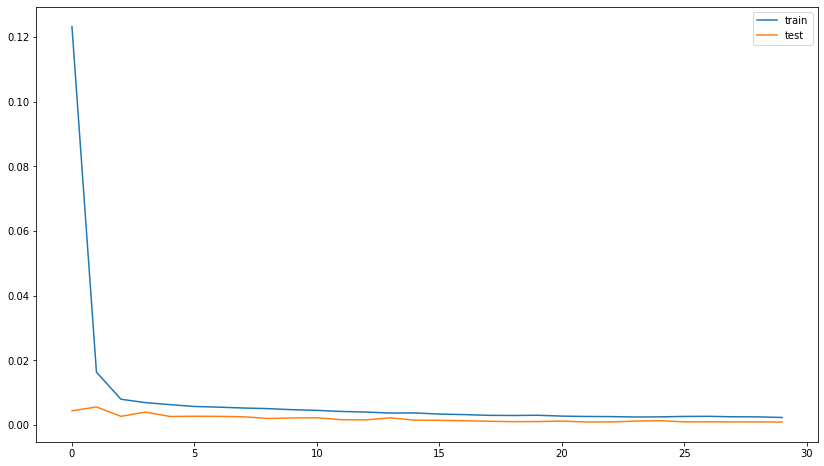

In [91]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [92]:
# prediccion
yhat = model.predict(test_X)
yhat[:15]

array([[0.48543367],
       [0.52130765],
       [0.552038  ],
       [0.53925973],
       [0.48357725],
       [0.4538503 ],
       [0.45400923],
       [0.48808128],
       [0.53145427],
       [0.55316335],
       [0.57948   ],
       [0.5982966 ],
       [0.59997034],
       [0.5871274 ],
       [0.5940294 ]], dtype=float32)

In [93]:
yhat.shape

(183, 1)

In [94]:
#El reshape de aqui es para regresar a la forma inicial a test_X antes de haberse transformado para entrenar la red neuronal
test_X = test_X.reshape((test_X.shape[0], test_X.shape[-1]))
test_X.shape

scaler2 = MinMaxScaler()
scaler2.fit(df2[["AF-01"]])

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -(test_X.shape[-1]-1):]), axis=1)
inv_yhat = scaler2.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

inv_yhat

array([17.3989896 , 17.83862522, 18.21522586, 18.05862801, 17.37623922,
       17.01193542, 17.01388317, 17.43143604, 17.96297202, 18.22901685,
       18.55152731, 18.78212462, 18.80263653, 18.64524613, 18.72983062,
       18.62743107, 18.51224344, 18.86015474, 18.95867996, 19.10763871,
       19.01876864, 18.49458835, 18.04947322, 17.96918454, 18.03765519,
       18.08753431, 18.04755651, 17.96262797, 17.77473306, 17.51710927,
       16.98066026, 16.83336037, 16.92438382, 17.11535615, 17.38370191,
       17.4394159 , 17.46926375, 17.49910429, 17.5289368 , 17.55876237,
       17.58857735, 17.61838502, 17.64818612, 17.67797846, 17.7077613 ,
       17.73753756, 17.76730287, 17.79706379, 17.82681303, 17.85655569,
       17.88628886, 17.91601326, 17.94573109, 17.97544015, 18.00513753,
       18.0348276 , 18.0645111 , 18.09418364, 18.12384887, 18.15350315,
       18.18315085, 18.21278833, 18.24241851, 18.27203772, 18.30164963,
       18.33124986, 18.3608457 , 18.39042767, 18.42000305, 18.44

In [95]:
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -(test_X.shape[-1]-1):]), axis=1)
inv_y = scaler2.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [96]:
# calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.378


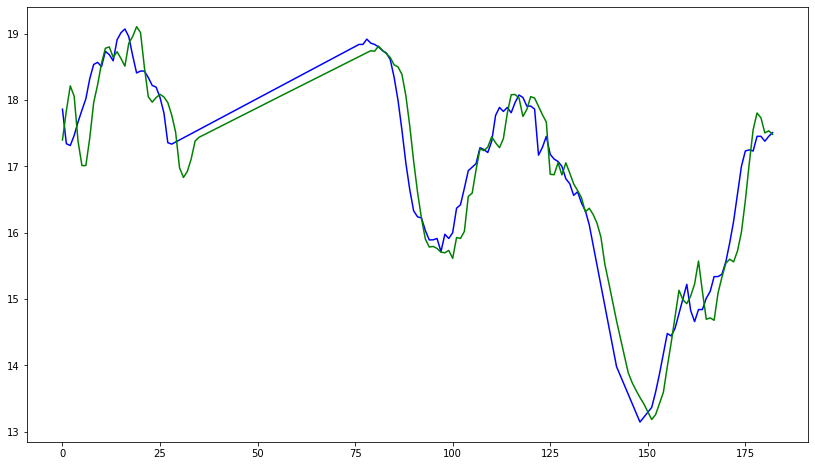

In [97]:
plt.plot(inv_y , color ="Blue") #Valor real
plt.plot(inv_yhat, color ="Green") #Predicción
plt.show()